# TP2 : Prediction of time series with a trend

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg

In [37]:
# Load the time series
dax = pd.read_csv('Dax_data.csv', index_col=0)
dax.index = pd.to_datetime(dax.index)
dax
# This time series represents the daily closing price of a German stock index from 
# the 1st of January 2017 to 19th of July 2017

,Value
2017-01-01,2562.19
2017-01-02,2578.36
2017-01-03,2572.06
2017-01-04,2551.80
2017-01-05,2570.44
...,...
2017-07-15,3302.57
2017-07-16,3374.93
2017-07-17,3439.22
2017-07-18,3407.83


In [38]:
len(dax)

200

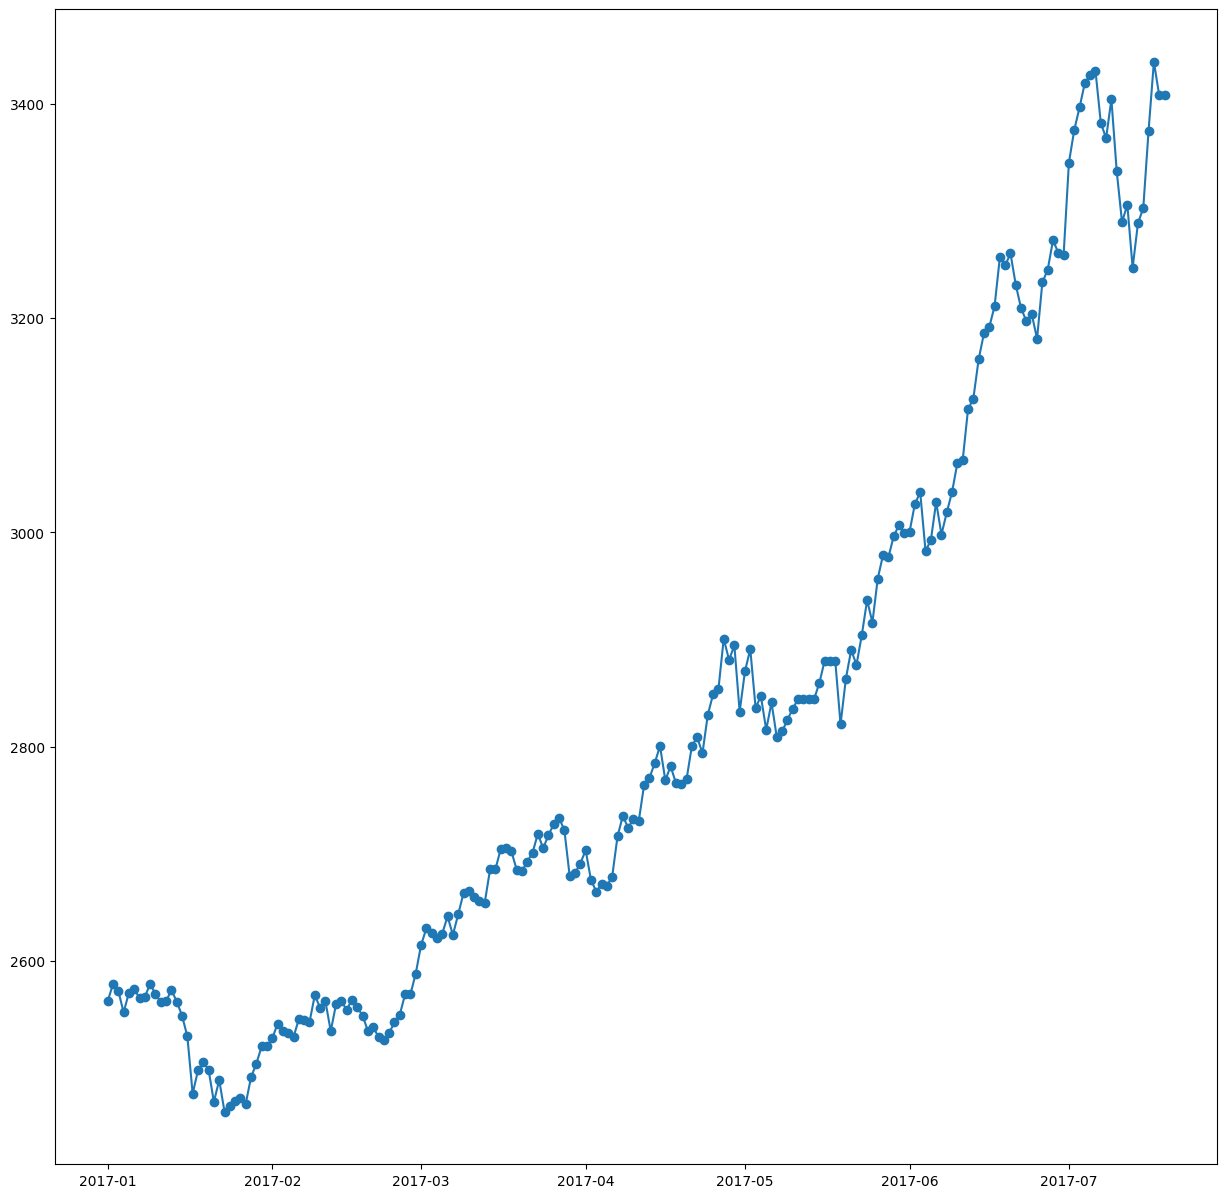

In [39]:
# Below is a plot of this time series
plt.figure(figsize = (15,15))
plt.plot(dax, marker = 'o')

In [40]:
# We'll start by standardizing the values of this time series so that the mean is 0 and the standard deviation is 1:
# It is recommended to do this before using complicated models.
dax_standard = (dax - np.mean(dax))/np.std(dax)
# This operation is reversible if you need to come back to the original values afterwards

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


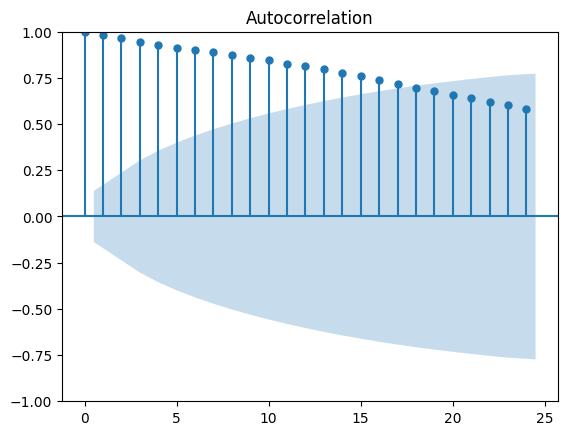

In [41]:
plot_acf(dax_standard)
plt.show()

In [42]:
dax_train = dax_standard.iloc[:173]
dax_validation = dax_standard.iloc[173:]

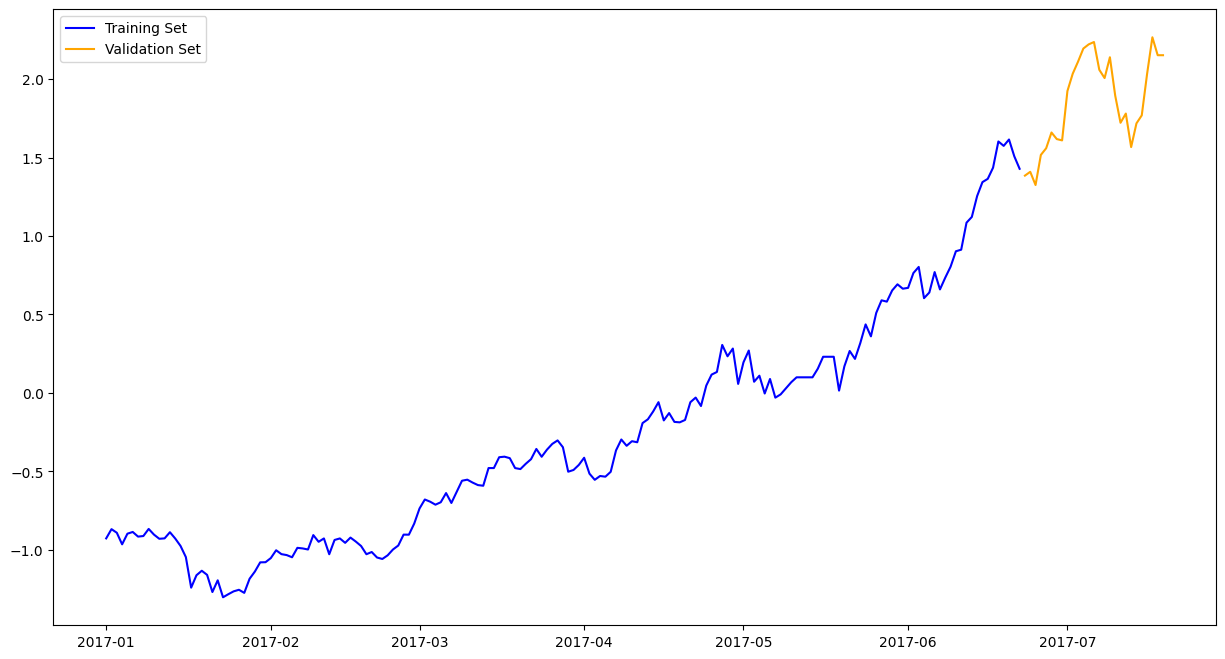

In [43]:
plt.figure(figsize=(15, 8))
plt.plot(dax_train, label='Training Set', color='blue')
plt.plot(dax_validation, label='Validation Set', color='orange')
plt.legend()
plt.show()

In [44]:
# Creation of a double exponential smoothing model on the training data:
from statsmodels.tsa.api import Holt
double_es = Holt(dax_train, initialization_method = "estimated").fit()
double_es.summary()
# When you ask for ' initialization_method = "estimated" ', the initial values of the algorithm (a and b) and the alpha 
# and beta parameter are chosen by python so that the intermediate predictions are the best.
# You can also ask to fix alpha and beta of your choice by specifying smoothing_level = 'what you want' and smoothing_trend = 'what you want'
# as parameters of the fit() function

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Value,No. Observations:,173
Model:,Holt,SSE,0.905
Optimized:,True,AIC,-900.737
Trend:,Additive,BIC,-888.124
Seasonal:,None,AICC,-900.231
Seasonal Periods:,None,Date:,"Fri, 14 Feb 2025"
Box-Cox:,False,Time:,10:50:06
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8487671,alpha,True
smoothing_trend,0.0214044,beta,True


In [45]:
# for the level (called a in the CM)
double_es.level

2017-01-01   -0.926633
2017-01-02   -0.877014
2017-01-03   -0.888844
2017-01-04   -0.953340
2017-01-05   -0.905673
                ...   
2017-06-18    1.580881
2017-06-19    1.580464
2017-06-20    1.614724
2017-06-21    1.528790
2017-06-22    1.448039
Length: 173, dtype: float64

In [46]:
# for the trend (called b in the CM)
double_es.trend

2017-01-01    0.003817
2017-01-02    0.004797
2017-01-03    0.004441
2017-01-04    0.002966
2017-01-05    0.003922
                ...   
2017-06-18    0.029076
2017-06-19    0.028444
2017-06-20    0.028569
2017-06-21    0.026118
2017-06-22    0.023831
Length: 173, dtype: float64

In [47]:
last_level = double_es.level[-1]
last_trend = double_es.trend[-1]
last_level, last_trend

C:\Users\PC\AppData\Local\Temp\ipykernel_8588\260017107.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_level = double_es.level[-1]
C:\Users\PC\AppData\Local\Temp\ipykernel_8588\260017107.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_trend = double_es.trend[-1]


(np.float64(1.4480389679750882), np.float64(0.023830603314813036))

In [48]:
prediction_t1 = last_level + last_trend
prediction_t2 = last_level + 2 * last_trend
prediction_t1, prediction_t2

(np.float64(1.4718695712899013), np.float64(1.4957001746047143))

In [49]:
double_es.forecast(2)

2017-06-23    1.47187
2017-06-24    1.49570
Freq: D, dtype: float64

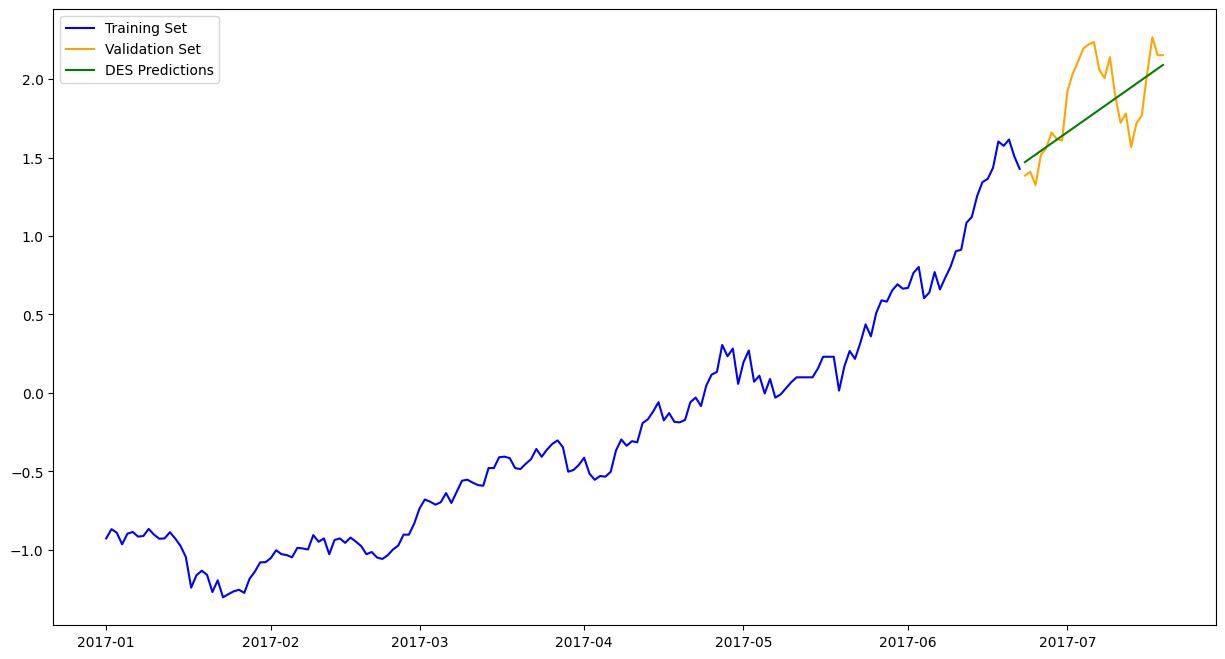

np.float64(1.6021036633477534)

In [50]:
# Compute the predictions for the whole validation set
validation_predictions = double_es.forecast(len(dax_validation))

# Plot the training, validation data and the predictions made by the DES algorithm
plt.figure(figsize=(15, 8))
plt.plot(dax_train, label='Training Set', color='blue')
plt.plot(dax_validation, label='Validation Set', color='orange')
plt.plot(dax_validation.index, validation_predictions, label='DES Predictions', color='green')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
squared_prediction_error = np.sum((dax_validation['Value'] - validation_predictions) ** 2)
squared_prediction_error

## Classical Auto-regressive models

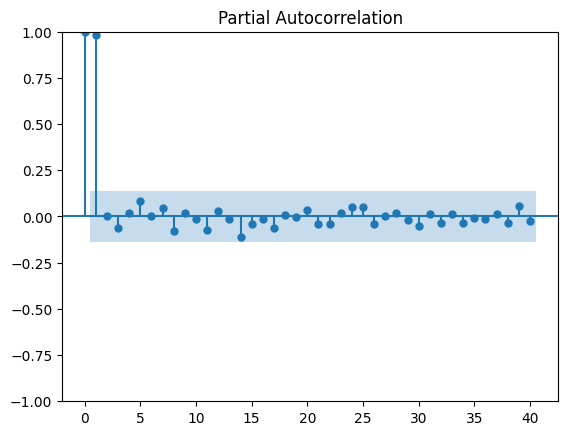

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(dax_standard, lags=40)
# The PACF is plotted.
# You should see that the last big coefficient is obtained for a lag of 1
# so we will use order 1 in the following

In [52]:
# Fit an AR model of order 1 using the training data
ar_model = AutoReg(dax_train, lags=1).fit()

# Print the BIC value
ar_model.bic

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


np.float64(-397.39560464307976)

In [53]:
ar_model = AutoReg(dax_train, lags=1).fit()
ar_model.summary()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Value   No. Observations:                  173
Model:                     AutoReg(1)   Log Likelihood                 206.419
Method:               Conditional MLE   S.D. of innovations              0.073
Date:                Fri, 14 Feb 2025   AIC                           -406.838
Time:                        10:50:07   BIC                           -397.396
Sample:                    01-02-2017   HQIC                          -403.007
                         - 06-22-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.006      2.740      0.006       0.005       0.028
Value.L1       1.0094      0.008    129.494      0.000       0.994       1.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9907           +0.0000j            0.9907            0.0000
-----------------------------------------------------------------------------
"""

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


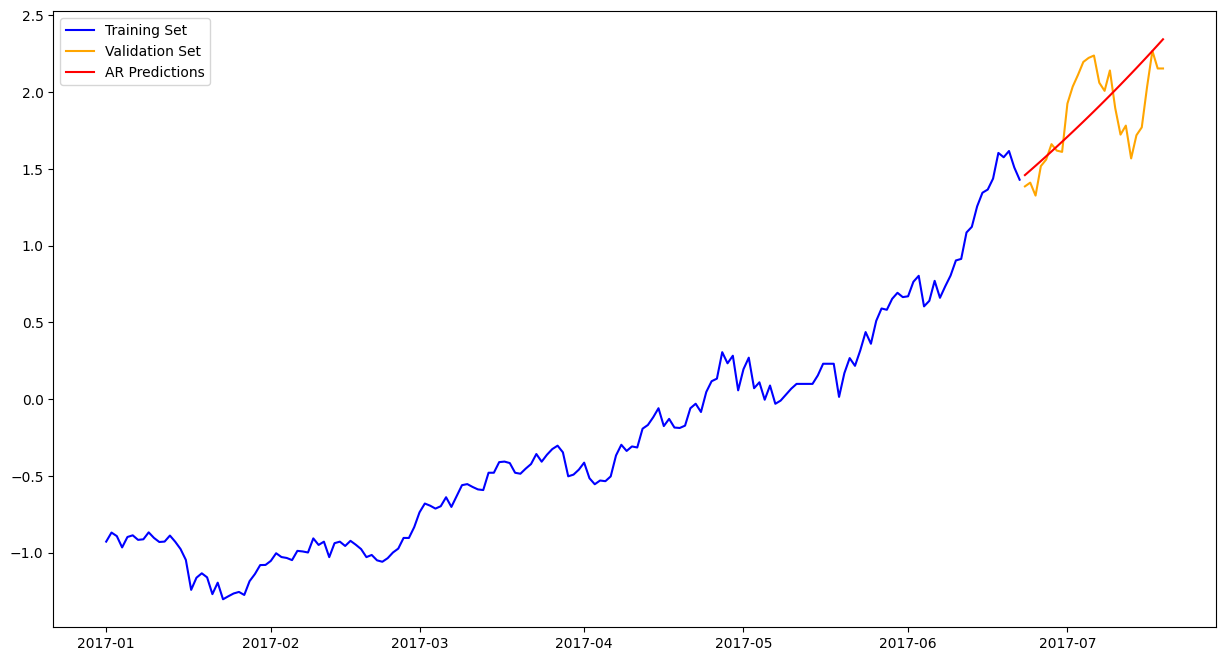

np.float64(1.773277166386281)

In [54]:
# Compute the predictions for the validation set
ar_validation_predictions = ar_model.predict(start=dax_validation.index[0], end=dax_validation.index[-1])

# Plot the training, validation data and the predictions made by the AR model
plt.figure(figsize=(15, 8))
plt.plot(dax_train, label='Training Set', color='blue')
plt.plot(dax_validation, label='Validation Set', color='orange')
plt.plot(dax_validation.index, ar_validation_predictions, label='AR Predictions', color='red')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
ar_squared_prediction_error = np.sum((dax_validation['Value'] - ar_validation_predictions) ** 2)
ar_squared_prediction_error

## Auto-regressive models with trend

In [55]:
# Create an ART model of order 1 using the training data
art_model = AutoReg(dax_train, lags=1, trend='ct').fit()

# Look at the estimated parameters
art_model.params

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


const      -0.068788
trend       0.000796
Value.L1    0.957275
dtype: float64

In [56]:
art_model.params

const      -0.068788
trend       0.000796
Value.L1    0.957275
dtype: float64

In [57]:
#You can find this value automatically by the command : 
art_model.forecast(1)

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2017-06-23    1.437745
Freq: D, dtype: float64

In [58]:
# Try different ART models with different orders and select the best one using the BIC criteria
best_bic = np.inf
best_order = None
best_art_model = None

for order in range(1, 11):  # Trying orders from 1 to 10
    try:
        model = AutoReg(dax_train, lags=order, trend='ct').fit()
        bic = model.bic
        if bic < best_bic:
            best_bic = bic
            best_order = order
            best_art_model = model
    except:
        continue

print(f'Best order: {best_order}')
print(f'Best BIC: {best_bic}')
best_art_model.summary()

Best order: 1
Best BIC: -398.32537887574557


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Value   No. Observations:                  173
Model:                     AutoReg(1)   Log Likelihood                 209.458
Method:               Conditional MLE   S.D. of innovations              0.072
Date:                Fri, 14 Feb 2025   AIC                           -410.915
Time:                        10:50:07   BIC                           -398.325
Sample:                    01-02-2017   HQIC                          -405.807
                         - 06-22-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0688      0.035     -1.976      0.048      -0.137      -0.001
trend          0.0008      0.000      2.487      0.013       0.000       0.001
Value.L1       0.9573      0.022     42.916      0.000       0.914       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0446           +0.0000j            1.0446            0.0000
-----------------------------------------------------------------------------
"""

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


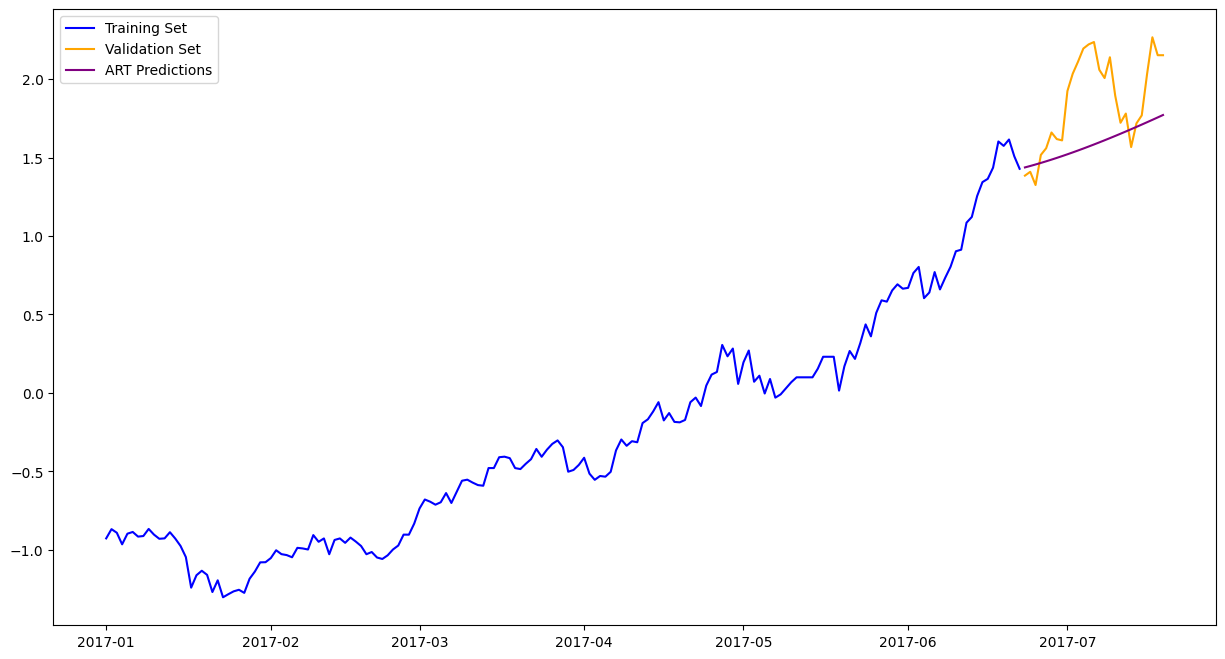

np.float64(3.4915106373324862)

In [59]:
# Compute the predictions for the validation set
art_validation_predictions = best_art_model.predict(start=dax_validation.index[0], end=dax_validation.index[-1])

# Plot the training, validation data and the predictions made by the ART model
plt.figure(figsize=(15, 8))
plt.plot(dax_train, label='Training Set', color='blue')
plt.plot(dax_validation, label='Validation Set', color='orange')
plt.plot(dax_validation.index, art_validation_predictions, label='ART Predictions', color='purple')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
art_squared_prediction_error = np.sum((dax_validation['Value'] - art_validation_predictions) ** 2)
art_squared_prediction_error

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


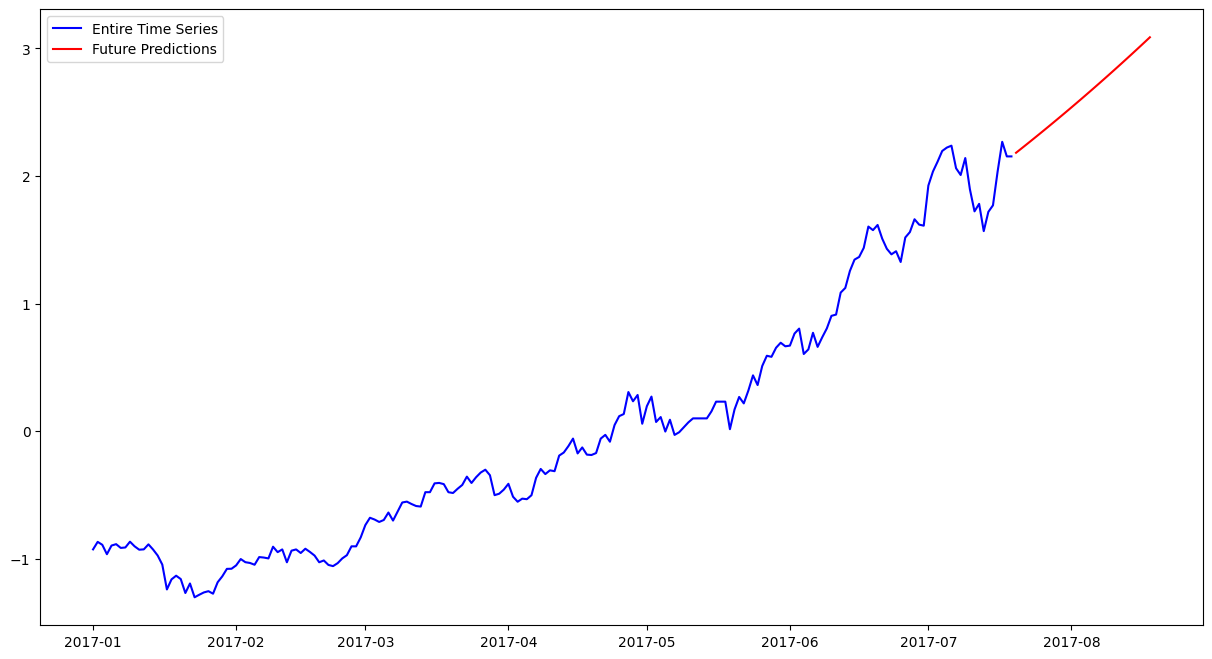

In [60]:
# Create an AR model on the entire time series
final_ar_model = AutoReg(dax_standard, lags=1).fit()

# Predict the next 30 values
future_predictions = final_ar_model.predict(start=len(dax_standard), end=len(dax_standard) + 29)

# Plot the entire time series and the predictions
plt.figure(figsize=(15, 8))
plt.plot(dax_standard, label='Entire Time Series', color='blue')
plt.plot(pd.date_range(start=dax.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.show()